### Task:
File **data.bin** contains messages about the current localization and a flag whether the autopilot is enabled (*control_switch_on = true*, if *enabled*) during one of the unmanned car's tuning passes in Las Vegas.  
Count the distances that he traveled autonomously and manually.

### Step 1: Analyze data

In [1]:
import re
import math
import matplotlib.pyplot as plt

In [2]:
# Look at the data.bin file
data = open('data.bin', 'r').read()

# After readind data we'll have a long string, for example first 1000 characters data.bin
print(data[0:999])

{"control_switch_on":false,"ts":1546824945154817766}
{"geo":{"lat":36.104064590834020976,"lon":-115.16390984327611591},"ts":1546825180350798251}
{"control_switch_on":false,"ts":1546824933503850568}
{"geo":{"lat":36.108299424669787925,"lon":-115.15556235939875762},"ts":1546824922700228433}
{"control_switch_on":true,"ts":1546825283218425487}
{"control_switch_on":true,"ts":1546825377347649109}
{"control_switch_on":true,"ts":1546825439100699419}
{"control_switch_on":true,"ts":1546825037183083174}
{"control_switch_on":true,"ts":1546825055883775692}
{"geo":{"lat":36.108036859972607147,"lon":-115.1637141700869762},"ts":1546825114378860488}
{"geo":{"lat":36.10818867519651576,"lon":-115.15555111881619155},"ts":1546824930740796009}
{"control_switch_on":false,"ts":1546825448952555500}
{"geo":{"lat":36.108920584167641721,"lon":-115.15558842993809208},"ts":1546824894799170618}
{"geo":{"lat":36.100835009170410217,"lon":-115.15337560244712733},"ts":1546825431957341382}
{"geo":{"lat":36.1007976580839


In [3]:
# We split the data into lines with the creation of a new list 'new_data' (breakdown by the newline character)
new_data = data.split('\n')

# First 10 elements of list new_data:
print(*new_data[:9], sep='\n')

{"control_switch_on":false,"ts":1546824945154817766}
{"geo":{"lat":36.104064590834020976,"lon":-115.16390984327611591},"ts":1546825180350798251}
{"control_switch_on":false,"ts":1546824933503850568}
{"geo":{"lat":36.108299424669787925,"lon":-115.15556235939875762},"ts":1546824922700228433}
{"control_switch_on":true,"ts":1546825283218425487}
{"control_switch_on":true,"ts":1546825377347649109}
{"control_switch_on":true,"ts":1546825439100699419}
{"control_switch_on":true,"ts":1546825037183083174}
{"control_switch_on":true,"ts":1546825055883775692}


In [4]:
# Sorting total_list by value 'ts':

# 1. From each line we will extract the numerical data ts, lat and lon using regular expressions
pattern_ts = re.compile('"ts":\d+')
pattern_lat = re.compile('"lat":[-]*\d+\.\d+')
pattern_lon = re.compile('"lon":[-]*\d+\.\d+')

# 2. Create a new list 'total_list' to record the found numbers:
total_list = []

# 3. See the length of list 'new_data' to understanding how many elements it containts:
print("Total elements in list 'new_data:' ", len(new_data[:]))

# 4. Going through the list 'new_data' of previously separated data from file data.bin:
for i in range(len(new_data)):
# 4.1 Condition for a string with 'lat', 'lon', 'ts' data:
    if len(new_data[i]) > 70:
        total_list.append([int(pattern_ts.search(new_data[i])[0][5:]), 
                           float(pattern_lat.search(new_data[i])[0][6:]),
                           float(pattern_lon.search(new_data[i])[0][6:])])
# 4.2 Condition for a string with с 'control_switch_on' и 'ts' данными
    elif 30 <= len(new_data[i]) <= 70:
        if 'false' in new_data[i]:
            total_list.append([int(pattern_ts.search(new_data[i])[0][5:]), False])
        elif 'true' in new_data[i]:
            total_list.append([int(pattern_ts.search(new_data[i])[0][5:]), True])
    
# 4.3 Condition for non-standard data:
    elif 0 < len(new_data[i]) < 30:
        print('There is non-standard data', new_data[i])

# 4.4 Condition for empty data:        
    else:
        print('There is empty string')

# 5. Function to select 'ts' from list included in 'total_list': 
def sort_by_ts(item):
    return item[0]

# 6. Sorting total_list by values 'ts'
total_list.sort(key = sort_by_ts)

print("len of sorted 'total_list' without empty or non-standard data:", len(total_list))

Total elements in list 'new_data:'  55885
There is empty string
len of sorted 'total_list' without empty or non-standard data: 55882


In [5]:
# We look at the resulting sorted sheet by time ('ts') - first 20 elements:
print(*total_list[:1000], sep='\n')

[1546824828757496239, 36.10892122044222, -115.15558840811516]
[1546824828777586872, 36.10892122044222, -115.15558840811516]
[1546824828796509301, 36.10892122044222, -115.15558840811516]
[1546824828816972709, 36.10892122044222, -115.15558840811516]
[1546824828837623740, 36.10892122044222, -115.15558840811516]
[1546824828856883744, 36.1089212204422, -115.1555884081152]
[1546824828877455488, 36.10892122044219, -115.1555884081152]
[1546824828897104820, 36.10892122044219, -115.1555884081152]
[1546824828917307748, 36.10892122044219, -115.1555884081152]
[1546824828936843431, 36.10892122044218, -115.1555884081152]
[1546824828958052260, 36.108921220442184, -115.1555884081152]
[1546824828977447138, 36.1089212204422, -115.1555884081152]
[1546824828997009264, 36.108921220442184, -115.1555884081152]
[1546824829017472367, 36.108921220442184, -115.1555884081152]
[1546824829036909861, 36.10892122044216, -115.1555884081152]
[1546824829057825539, 36.10892122044216, -115.15558840811521]
[1546824829077638

In [6]:
# We look at the last element resulting sorted sheet by time ('ts'):
print(total_list[-1])

[1546825451736340003, 36.10076611119979, -115.15040164160897]


In [7]:
# Explain 1 for code above: selection 'ts' from string like 
# '{"geo":{"lat":36.10149226084502061,"lon":-115.16387781760974462},"ts":1546825308916412722}'
temp_pattern = re.compile('"ts":\d+')
temp_string = '{"geo":{"lat":36.10149226084502061,"lon":-115.16387781760974462},"ts":1546825308916412722}'
temp_pattern.search(temp_string)[0][5:]

'1546825308916412722'

In [8]:
# Explain 2 for code above: selection 'ts' from string like 
# '{"control_switch_on":true,"ts":1546825283218425487}'

# creating list like [1546825283218425487, True] from string
temp_list = []
temp_pattern = re.compile('"ts":\d+')
temp_string = '{"control_switch_on":true,"ts":1546825283218425487}'
if 'true' in temp_string:
    temp_list.append([int(temp_pattern.search(temp_string)[0][5:]), True])

# selection 'ts' from list like [1546825283218425487, True]
def sort_by_ts(item):
    return item[0]

sort_by_ts(temp_list[0])

1546825283218425487

In [9]:
# Checking, that 'total_list' sorted by 'ts':
print(len(total_list))
ts_temp = total_list[0][0]
k = 1
for step in total_list[1:]:
    if ts_temp < step[0]:
        k += 1
print(k)        

55882
55882


In [10]:
# We look at the maximum difference in coordinates before the first mention of 'control_switch_on'.
# (This operation is need to understand the error determination of coordinates when the car is stands motionless)

is_switch_true = True
count = 1
lat_1 = total_list[0][1]
lon_1 = total_list[0][2]
delta = 0

while is_switch_true:
    if total_list[count][1] in [True, False]:
        is_switch_true == False
        print("The first mention of 'control_switch_on' in {} element of total_list".format(count))
        break
    else:
        lat_2 = total_list[count][1]
        lon_2 = total_list[count][2]
        if ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2) > delta**2:
            delta = ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2)**0.5
            lat = lat_2 - lat_1
            lon = lon_2 - lon_1
            lat_1 == lat_2
            lon_1 == lon_2
            count += 1
        else: 
            lat_1 == lat_2
            lon_1 == lon_2
            count += 1
print("The max lenght of 'delta' = {:.5e} from delta 'lat' = {:.5e} and delta 'lon' = {:.5e}"
      .format(delta, lat, lon))

The first mention of 'control_switch_on' in 227 element of total_list
The max lenght of 'delta' = 1.42109e-13 from delta 'lat' = 1.13687e-13 and delta 'lon' = 8.52651e-14


In [11]:
# Just for example 226 and 227 elements of total_list
print(total_list[226])
print(total_list[227])

[1546824833277949717, 36.108921220442255, -115.15558840811514]
[1546824833299288379, False]


In [12]:
# We look at the maximum difference in coordinates after the first mention of 'control_switch_on'.
# (This operation is need to understand the changes of coordinates when the car is moves)

is_switch_true = True
count = 1
lat_1 = total_list[226][1]
lon_1 = total_list[226][2]
delta = 0


for step in range(227, len(total_list)):
    if total_list[step][1] not in [True, False]:
        lat_2 = total_list[step][1]
        lon_2 = total_list[step][2]
        if ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2) > delta**2:
            delta = ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2)**0.5
            lat = lat_2 - lat_1
            lon = lon_2 - lon_1
            print(delta, lat, lon)
            lat_1 == lat_2
            lon_1 == lon_2
        else: 
            lat_1 == lat_2
            lon_1 == lon_2

print("The max lenght of 'delta' = {:.5e} from delta 'lat' = {:.5e} and delta 'lon' = {:.5e}"
      .format(delta, lat, lon))

7.105427357601002e-15 -7.105427357601002e-15 0.0
1.4210854715202004e-14 -1.4210854715202004e-14 0.0
3.552713678800501e-14 -2.1316282072803006e-14 -2.842170943040401e-14
4.0194366942304644e-14 -2.842170943040401e-14 -2.842170943040401e-14
4.5496934130773415e-14 -3.552713678800501e-14 -2.842170943040401e-14
5.728578676879116e-14 -4.973799150320701e-14 -2.842170943040401e-14
5.728578676879116e-14 -4.973799150320701e-14 -2.842170943040401e-14
5.728578676879116e-14 -4.973799150320701e-14 -2.842170943040401e-14
8.038873388460929e-14 -5.684341886080802e-14 -5.684341886080802e-14
8.556067554929069e-14 -6.394884621840902e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0845964142784046e-13 -9.237055564881302e-14 -5.684341886080802e-14
1.084596

7.054043635025934e-08 6.727879053869401e-08 -2.120182784892677e-08
7.054043635025934e-08 6.727879053869401e-08 -2.120182784892677e-08
7.054043635025934e-08 6.727879053869401e-08 -2.120182784892677e-08
7.054043635025934e-08 6.727879053869401e-08 -2.120182784892677e-08
7.064416727048419e-08 6.73544064966336e-08 -2.1306860276126827e-08
7.064416727048419e-08 6.73544064966336e-08 -2.1306860276126827e-08
7.064416727048419e-08 6.73544064966336e-08 -2.1306860276126827e-08
7.064416906816943e-08 6.735439939120624e-08 -2.1306888697836257e-08
7.066737200314467e-08 6.735621127518243e-08 -2.1377985603976413e-08
7.066737200314467e-08 6.735621127518243e-08 -2.1377985603976413e-08
7.066737877564315e-08 6.735621838060979e-08 -2.1377985603976413e-08
7.084349140214229e-08 6.749345971002185e-08 -2.1527498006435053e-08
7.097560059965628e-08 6.755504244893018e-08 -2.1768144620182284e-08
7.097560059965628e-08 6.755504244893018e-08 -2.1768144620182284e-08
7.097560059965628e-08 6.755504244893018e-08 -2.17681446

8.022294587158216e-08 7.367462018237347e-08 -3.174541518546903e-08
8.051184503410689e-08 7.393868628469136e-08 -3.186264052601473e-08
8.061923157711843e-08 7.403969704000701e-08 -3.1899588748274255e-08
8.071691466053538e-08 7.410996971657369e-08 -3.1983319104256225e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8.094361254942344e-08 7.430082860082621e-08 -3.2113163683789026e-08
8.098846608046688e-08 7.400971213655794e-08 -3.28891189838032e-08
8.098846608046688e-08 7.400971213655794e-08 -3.28891189838032e-08
8.098846608046688e-08 7.400971213655794e-08 -3.28891189838032e-08
8.098846608046688e-08 7.400971213655794e-08 -3.28891189838032e-08
8.131975834028479e-08 7.433177984239592e-08 -3.298013950825407e-08
8.143851689450763e-08 7.44178549894059e-08 -3.307891915937944e-

9.337692590724076e-06 -9.336725455000305e-06 1.3439009194371465e-07
9.602337986440034e-06 -9.601354165056364e-06 1.3745182059210492e-07
9.866309733787375e-06 -9.86530987745482e-06 1.4045919272120955e-07
1.0154241038126519e-05 -1.0153225218800799e-05 1.436270054000488e-07
1.0625179851770737e-05 -1.062413880248414e-05 1.4873327813802462e-07
1.0720929001737016e-05 -1.071988299372606e-05 1.497573407505115e-07
1.1005724567543531e-05 -1.1004663690528105e-05 1.5280809861906164e-07
1.129358090468534e-05 -1.1292505746496317e-05 1.5583201218305476e-07
1.1596211020530584e-05 -1.1595121300445044e-05 1.5897188632152393e-07
1.1889707575480415e-05 -1.1888604994680918e-05 1.6191822282962676e-07
1.2188883826528575e-05 -1.2187767964633167e-05 1.6492718657445948e-07
1.249638229830485e-05 -1.2495252640576382e-05 1.6802378866032086e-07
1.2814097473095143e-05 -1.2812954260255083e-05 1.7116417438955978e-07
1.3122082911856746e-05 -1.3120926730891824e-05 1.7418859954432264e-07
1.3452204512854522e-05 -1.3451035

7.626401051028795e-05 -7.625979923631121e-05 8.014484080831608e-07
7.675151265454739e-05 -7.674722407102763e-05 8.11352052210168e-07
7.727344305092645e-05 -7.726905816696217e-05 8.231955632709287e-07
7.77959174667268e-05 -7.779145208530736e-05 8.335208150356266e-07
7.825286578711622e-05 -7.824833036096379e-05 8.424960640240897e-07
7.874537564696223e-05 -7.874075400593483e-05 8.53137947842697e-07
7.922764908072593e-05 -7.922292841300305e-05 8.648656120158194e-07
7.973482748419142e-05 -7.972998827199262e-05 8.784555092233859e-07
8.023278822149598e-05 -8.022787417161226e-05 8.879818125251404e-07
8.071309909779293e-05 -8.070811269078604e-05 8.971688032488601e-07
8.123598759131084e-05 -8.12309288633628e-05 9.06573731640492e-07
8.16964864200684e-05 -8.169137328906118e-05 9.140150609709963e-07
8.218034629025295e-05 -8.217509111574373e-05 9.293634946061502e-07
8.267324297235422e-05 -8.266792213618146e-05 9.379516257013165e-07
8.31680112524001e-05 -8.316262789520579e-05 9.462648904445814e-07
8.

0.0001510570580673177 -0.00015099720074829293 4.252076919897263e-06
0.0001514762043547985 -0.00015141594955991877 4.272084339618232e-06
0.00015190117628709904 -0.0001518405255325206 4.29210477648212e-06
0.00015235130624666285 -0.00015229002518424295 4.32073424860846e-06
0.00015281623618725634 -0.0001527541421779688 4.3559258386949296e-06
0.00015324309067327364 -0.000153180614134385 4.375419123903157e-06
0.0001536828745423619 -0.00015361989770212858 4.399199653448704e-06
0.00015411634479240888 -0.00015405290736225652 4.421477740379487e-06
0.00015458201755606585 -0.0001545170517402994 4.481168730308127e-06
0.00015502071926129434 -0.00015495523212649687 4.505489641815075e-06
0.0001554625795452067 -0.00015539659363383862 4.529053526880489e-06
0.0001558938798826483 -0.00015582734967267697 4.553995921696696e-06
0.00015635314686353246 -0.0001562860603527838 4.5797241767786545e-06
0.00015679096233996693 -0.00015672336682825971 4.603494488719662e-06
0.0001573059115731377 -0.0001572374228260287 

0.00023176225133170086 -0.00023162053345515687 8.10367967574166e-06
0.00023226296861201306 -0.00023212085012858097 8.123886019006932e-06
0.00023275438688086163 -0.00023261191223866717 8.142659083887338e-06
0.000233229540423905 -0.0002330867699598116 8.159423757092554e-06
0.0002337331641084294 -0.00023359048448412523 8.165633019530105e-06
0.00023422793015868143 -0.00023408487739828843 8.18495203702696e-06
0.000234717556274693 -0.0002345741474059082 8.203693823816138e-06
0.00023521315482016777 -0.00023506946356377512 8.220431880090473e-06
0.00023569605835989146 -0.00023555144157683117 8.255319343675183e-06
0.00023618641763710368 -0.0002360414708775238 8.273324738183874e-06
0.00023667557220342813 -0.00023653032351944603 8.290508645814043e-06
0.00023715690426075788 -0.0002370113843710442 8.306679063707634e-06
0.00023762882713391847 -0.00023748301361337099 8.323324465209225e-06
0.00023813878863026685 -0.00023799084335962561 8.39292125931479e-06
0.0002386207827763894 -0.00023847258597697873 

0.00028945931818868525 -0.00028928235067837704 1.0120201196173184e-05
0.0002898877691612155 -0.000289710814392663 1.0127326063980036e-05
0.0002903191396620152 -0.00029014232089963343 1.0130966245469608e-05
0.00029074160686889976 -0.00029056487535683573 1.0135836106428542e-05
0.00029115913852035305 -0.00029098390665893703 1.0100000466195524e-05
0.0002915901285620117 -0.0002914150132227178 1.0104115162334892e-05
0.000291992707729233 -0.00029181764384844655 1.0109604630770264e-05
0.00029242421631482505 -0.00029224927275350865 1.011359789515609e-05
0.00029283449914996367 -0.00029265962241709076 1.0118759760757712e-05
0.00029330224491866657 -0.0002931282954961034 1.0099963063225914e-05
0.0002936996193483321 -0.0002935258131415708 1.0102644452558707e-05
0.0002940953281930954 -0.0002939216188551086 1.0106633197892734e-05
0.00029452272385387145 -0.0002943491737568138 1.0109340976782732e-05
0.00029494896117441 -0.00029477521196241696 1.0122455748273751e-05
0.0002953604974328882 -0.0002951868602

0.00043596253833318453 -0.0004358737557268455 8.797948538585842e-06
0.00043650673412423875 -0.00043641851037534707 8.775690147899695e-06
0.0004370266338290056 -0.0004369392747136658 8.737785108792195e-06
0.00043756249433634834 -0.00043747571640295746 8.714012139421357e-06
0.00043811134342721097 -0.0004380251144411318 8.691855867937193e-06
0.0004386330378683078 -0.0004385473134362883 8.6715504608037e-06
0.0004391624778126167 -0.0004390772673090737 8.65073701561414e-06
0.00043969468607962234 -0.0004396099871257775 8.629958628603163e-06
0.00044024371056719226 -0.00044015954877352215 8.607921785142025e-06
0.00044078299993574594 -0.00044069935334789534 8.586791665265991e-06
0.00044130629751330846 -0.00044122314339034574 8.566560666167788e-06
0.0004418257174311328 -0.0004417430536065581 8.546295916289637e-06
0.00044237268124031466 -0.0004422908382082369 8.509027253467139e-06
0.00044288990961960297 -0.0004428085242196289 8.490166152341772e-06
0.0004434206683231006 -0.0004433397341330192 8.471

0.0005215825668750425 -0.0005214920599030393 9.716250616520483e-06
0.0005220380558159888 -0.000521946955949204 9.7522764264113e-06
0.0005225259289763826 -0.0005224343872072268 9.780466044162495e-06
0.0005229971752843386 -0.000522904957819037 9.820918677405643e-06
0.0005234746222364986 -0.0005233817202210389 9.861798218935292e-06
0.0005239539354739524 -0.0005238603365640415 9.903245612008504e-06
0.0005244281746255128 -0.0005243338812590537 9.94441073487451e-06
0.0005248924955352176 -0.0005247974971851477 9.985930972788992e-06
0.0005253703894019621 -0.0005252756191467256 9.97847635630933e-06
0.0005258482781955289 -0.0005257527805255791 1.0021249963187984e-05
0.0005263184434874862 -0.0005262222149298168 1.0064018553634924e-05
0.0005267850565922045 -0.0005266880927479178 1.0106869268611263e-05
0.000527288305206897 -0.0005271917705087503 1.0089297092008565e-05
0.0005277171507977926 -0.0005276199381683 1.0128775514317567e-05
0.0005281960458017146 -0.0005280980570603333 1.017373725176185e-05


0.0005852614874270886 -0.0005849763577927547 1.826662226278586e-05
0.0005857019402215822 -0.0005854144471655331 1.8349055267208314e-05
0.0005861133838309956 -0.0005858235397226963 1.8430382866085893e-05
0.000586550707632185 -0.0005862584877505128 1.8512648765067752e-05
0.0005869741491954352 -0.0005866795754343457 1.8593751420326043e-05
0.0005874288016750531 -0.0005871317194632297 1.8679963531553767e-05
0.0005878496834222085 -0.0005875503002457094 1.8758864058554536e-05
0.00058826814018381 -0.0005879655437226461 1.8865952142732567e-05
0.000588703804199965 -0.0005883988204828938 1.894721968653812e-05
0.0005891456724036177 -0.0005888382473884235 1.90300216615924e-05
0.0005895634521528402 -0.0005892537158658229 1.9108177639282076e-05
0.0005900002510466176 -0.0005896880530613657 1.9191047698541297e-05
0.000590433606977131 -0.0005901189535464368 1.9273425053256688e-05
0.0005908674056551385 -0.0005905503465939432 1.9354048760078513e-05
0.0005912864509036075 -0.0005909670785797516 1.9431393596

0.0006834886956587128 -0.0006824309562745157 3.801035400385899e-05
0.0006837668094732489 -0.0006827076709754465 3.8043208704152676e-05
0.0006840339158086263 -0.0006829732874393812 3.807737675742828e-05
0.0006843204149719554 -0.000683258257041075 3.81127869957254e-05
0.000684606512485783 -0.0006835428112808017 3.814842177973787e-05
0.0006848800356401588 -0.000683813836843683 3.8200782185526805e-05
0.0006851691065589465 -0.0006841013955849462 3.823591428897544e-05
0.0006854506619511861 -0.0006843814294228423 3.8270994636491196e-05
0.0006857328893055405 -0.0006846621824507793 3.830523981207534e-05
0.0006860153980274183 -0.0006849431932138828 3.833990611212812e-05
0.0006863152993850549 -0.0006852415007685408 3.837676112539157e-05
0.0006865955754248016 -0.0006855204956437433 3.840747642414044e-05
0.000686886115588295 -0.0006858095169945955 3.844271306263636e-05
0.0006871695298947367 -0.0006860914795439044 3.847654497235453e-05
0.0006874603733839366 -0.0006863808547805661 3.8510870723484913e

0.0007251114166207047 -0.0007240702686885925 3.8843435930857595e-05
0.0007252901699032293 -0.0007242507426212796 3.8816135443653366e-05
0.0007254680688006715 -0.000724430403259646 3.8788009518953004e-05
0.0007256465027878979 -0.0007246106527603047 3.875885595050477e-05
0.0007258255847987275 -0.0007247915313968178 3.873003439025524e-05
0.0007259843463966293 -0.0007249521890315691 3.8698770410405814e-05
0.0007261613420056213 -0.0007251310571589897 3.866839234945019e-05
0.0007263323460889272 -0.0007253038429126946 3.863951903326779e-05
0.0007264944500875099 -0.0007254677242443108 3.8610453088949725e-05
0.00072666150468569 -0.0007256365306247403 3.858196230055455e-05
0.0007268154007050994 -0.000725792388152513 3.854913749989919e-05
0.0007269757715363444 -0.0007259545373372589 3.8519892527233424e-05
0.0007271383619614753 -0.0007261189092915288 3.849060931315762e-05
0.000727295623531946 -0.0007262779805188302 3.846061650847332e-05
0.0007274484138853515 -0.0007264325150231343 3.84317054198390

0.0007429361382074174 -0.0007421275492021095 3.465265025681674e-05
0.0007430231105960114 -0.0007422159583541088 3.4623894123342325e-05
0.0007431091746348716 -0.0007423034536273576 3.4595204283505154e-05
0.0007431965852149741 -0.0007423923206602012 3.456597315221188e-05
0.000743282580072321 -0.0007424800991913116 3.4529641524727595e-05
0.0007433666570448688 -0.0007425655682880006 3.450164632567976e-05
0.0007434533815852231 -0.0007426537370136543 3.447256140987065e-05
0.0007435575452403197 -0.0007427596399338654 3.443748494191823e-05
0.0007436272624239302 -0.0007428304576180267 3.441535493209358e-05
0.0007437115636038166 -0.0007429161613003998 3.438701959623813e-05
0.000743798629782195 -0.0007430046848213578 3.435753191638469e-05
0.0007438833334097094 -0.0007430908216292664 3.432847994133681e-05
0.0007439665147939156 -0.0007431754093047971 3.429994372083911e-05
0.000744048645502593 -0.00074325895030114 3.42712659744393e-05
0.0007441225432480736 -0.0007433347287317815 3.42321549311464e-05

0.0007477887930735187 -0.0007470711920092299 3.2752299404137375e-05
0.0007477942583632403 -0.0007470767301924752 3.275075641795411e-05
0.0007477942584088927 -0.0007470767301285264 3.275075891906454e-05
0.0007477942588459951 -0.0007470767305193249 3.275075998487864e-05
0.0007477942588981749 -0.0007470767305690629 3.275076004172206e-05
0.0007477942591180971 -0.0007470767307680148 3.275076052489112e-05
0.0007477987854935068 -0.0007470812090417667 3.275195692253874e-05
0.0007477987859532852 -0.0007470812094751977 3.275195753360549e-05
0.0007477987860983695 -0.0007470812096173063 3.2751957604659765e-05
0.0007477987866712054 -0.0007470812101146862 3.275195933838404e-05
0.0007477987869931165 -0.0007470812103989033 3.275196020524618e-05
0.0007478030759223367 -0.0007470856494293798 3.27486301330282e-05
0.0007478030762259431 -0.0007470856497064915 3.274863074409495e-05
0.0007478030763690235 -0.0007470856498272838 3.274863125568572e-05
0.0007478030765688732 -0.0007470856499693923 3.27486325772952

0.0007485432153976544 -0.0007478400042799649 3.243876255965006e-05
0.0007485436674022558 -0.0007478404646903414 3.243857857171406e-05
0.000748544096055318 -0.0007478409011625331 3.243840760092098e-05
0.0007485455881093748 -0.0007478424205942247 3.243780876971414e-05
0.0007485465951245499 -0.000747843446184504 3.243740235348014e-05
0.0007485517195795169 -0.0007478486018257513 3.2436794427326276e-05
0.0007485527250006035 -0.000747849625774677 3.243638904848467e-05
0.0007485530926029369 -0.0007478500002733313 3.243623801552076e-05
0.0007485571802437624 -0.0007478541201919597 3.2435582411949326e-05
0.0007485580468905328 -0.0007478550028210407 3.243523269702564e-05
0.0007485588809457953 -0.0007478558521682999 3.24348981877165e-05
0.000748559096720947 -0.0007478560720741712 3.24348076219394e-05
0.0007485619695230001 -0.000747859014815333 3.243325724611168e-05
0.0007485659461603764 -0.0007478630644826012 3.243165943445092e-05
0.0007485710696607052 -0.000747868281983699 3.2429602768502264e-05


0.0007788889156586012 -0.0007788538287201163 7.392998298882958e-06
0.0007794672358172492 -0.0007794393658144827 6.5914134523836765e-06
0.0007800717237985766 -0.0007800506948214547 5.727807490529813e-06
0.000780684033885617 -0.0007806689965406122 4.845472545866869e-06
0.0007812730739923791 -0.0007812629216275013 3.982892863518828e-06
0.000781873530149201 -0.0007818674398762937 3.08603455323464e-06
0.0007824677517841588 -0.0007824647127350204 2.180804131057812e-06
0.0007830642397418069 -0.000783063231160952 1.2568079341690463e-06
0.0007836871213302359 -0.0007836870780906224 2.60331816548387e-07
0.000784280999167855 -0.0007842806887339293 -6.978071098728833e-07
0.0007848879536942664 -0.0007848861153831876 -1.6987445548011237e-06
0.000785467711885692 -0.0007854631523898092 -2.6763132865426087e-06
0.0007860561242997819 -0.0007860474836576259 -3.6856457654721453e-06
0.0007866736036245314 -0.0007866590204201884 -4.790013690580963e-06
0.0007872557444521882 -0.0007872341330994459 -5.83325433467

0.0010838235251187703 -0.0008491491790465489 -0.0006735125131172026
0.0010862978192358963 -0.0008492813269427302 -0.0006773213268331801
0.0010886586003387942 -0.0008494018907754253 -0.0006809507882650223
0.0010910695339442725 -0.000849526508638121 -0.0006846440235790396
0.0010936074746860848 -0.0008497537416687351 -0.0006884009639804844
0.0010960516248872288 -0.0008498731936086301 -0.0006921305651417242
0.0010984009216000465 -0.0008499882344992216 -0.0006957043810302821
0.0011009366177986686 -0.000850109851953107 -0.0006995531974212099
0.0011033618794881158 -0.0008502226696407433 -0.0007032274519218618
0.0011059387463511596 -0.0008504137166980286 -0.0007070339603814091
0.0011084033158992963 -0.0008505271057615005 -0.0007107471794256526
0.0011108320326129034 -0.0008506334099251944 -0.000714402272251391
0.0011133477652580423 -0.0008507441734622034 -0.0007181765783741412
0.0011159466068354285 -0.0008509754158865235 -0.0007219263611091264
0.0011184903584261282 -0.0008510835976238695 -0.000

0.0014740085413585539 -0.0008596659279831442 -0.001197361963761523
0.001476685279172127 -0.0008596821646520425 -0.001200643989491823
0.001479380091458386 -0.000859701582790251 -0.0012039429569341564
0.0014822317740469722 -0.0008597246466308661 -0.0012074289063832566
0.0014849737985641513 -0.0008598261869892099 -0.0012107213183014665
0.001487705878856967 -0.0008598502057282076 -0.001214053707911944
0.0014904256447556394 -0.0008598728553295132 -0.0012173689971461954
0.0014932869841203541 -0.000859897655594466 -0.0012208529964112813
0.0014959672149084061 -0.0008599376661067026 -0.0012241017598597637
0.0014987318190043972 -0.0008599610996853357 -0.0012274624117765143
0.0015015370497776029 -0.0008599882628601563 -0.0012308670519587395
0.0015041735238402385 -0.0008600150405229101 -0.001234063256035256
0.0015070098137573563 -0.0008600444865720647 -0.001237498307020246
0.0015097391951856332 -0.0008601377637802443 -0.0012407560053446787
0.0015124764121687197 -0.0008601667436138882 -0.0012440651

0.0020445979264682728 -0.0008597429213565988 -0.0018550533119281454
0.0020476127513081987 -0.0008597220777701864 -0.0018583853013609541
0.0020507253513876965 -0.0008597007233603904 -0.001861824141286661
0.0020535927025252744 -0.0008596814344983272 -0.0018649908361823009
0.0020567437269553303 -0.0008596605309350025 -0.0018684695689046293
0.0020597916251894974 -0.000859639424632519 -0.0018718337529861628
0.0020628495074198026 -0.0008596643357918765 -0.001875186742708479
0.002065750210176371 -0.0008596482624838586 -0.0018783846239927016
0.002068907026318917 -0.0008596280024377734 -0.0018818650273004778
0.0020718785997852797 -0.0008596107589795565 -0.0018851393251679838
0.0020750025781860557 -0.0008596308277830644 -0.0018885630885421278
0.002077987564606073 -0.0008596139777452549 -0.0018918499221456386
0.0020811191058916255 -0.0008595961708266486 -0.0018952971154959641
0.002084163787264349 -0.0008595823757033827 -0.0018986460521972504
0.002087126857006805 -0.0008595651474294641 -0.00190190

0.003052398338242285 -0.000857444587566647 -0.0029294921734930313
0.003055599561605729 -0.0008574252960187323 -0.002932833193796114
0.003058955184271635 -0.0008574059231776232 -0.0029363347735369416
0.0030623203850198397 -0.0008574684229856189 -0.002939822110960222
0.003065561146031133 -0.000857451483142313 -0.002943202693344915
0.003068746427523988 -0.0008574338285782801 -0.0029465253886655773
0.0030720886048912033 -0.0008574129644713935 -0.0029500121024597092
0.00307532894173279 -0.0008573922399008893 -0.002953392396349841
0.0030785431312812766 -0.0008573722080669199 -0.0029567449514615873
0.003081884569378878 -0.0008573545927106352 -0.002960228977855195
0.003085189951025277 -0.0008573621125123054 -0.002963667869707365
0.003089019850514436 -0.0008573379142404747 -0.0029676615941980344
0.003091770171222005 -0.0008573693936710924 -0.0029705151934393825
0.0030950020551917938 -0.0008573481254359194 -0.0029738849865879047
0.003098262534819045 -0.0008573197237140562 -0.00297728628552818
0.

0.0036590378148537973 -0.000852605955692809 -0.0035583171324162777
0.003662129936924615 -0.0008524936757154933 -0.003561523579563186
0.0036651432758185248 -0.0008523782330698282 -0.003564649573249312
0.0036687152299334784 -0.0008522404964992347 -0.003568355023602976
0.0036711909550806074 -0.0008521437399338083 -0.0035709234205114626
0.003674054603934995 -0.0008520279120247665 -0.0035738950278130233
0.003677050412895464 -0.000851939599485263 -0.0035769957587064027
0.0036801735718775125 -0.0008518139554070103 -0.003580236096198064
0.003683077055741307 -0.0008516947289578525 -0.0035832489010942936
0.0036860797019962 -0.0008515687143741957 -0.00358636505310983
0.0036890028629955065 -0.0008514690807430725 -0.0035893930584052214
0.00369193588223051 -0.0008513395629066167 -0.003592438100668005
0.0036948677354571046 -0.0008512097306834221 -0.003595481828199354
0.0036979641722787735 -0.0008510716578271627 -0.0035986964379759456
0.0037008816373689654 -0.0008509446136599763 -0.003601724331247169


0.004135688689893327 -0.0008268942163169868 -0.004052180511123993
0.004138250861690153 -0.0008267790930389651 -0.004054818926363168
0.004140736180738304 -0.0008266647582786391 -0.0040573786483264485
0.004143202565336179 -0.0008265820229667042 -0.004059912518357578
0.004145701715238876 -0.0008264753264057845 -0.004062484614934192
0.004148068310363218 -0.0008263719812973136 -0.004064920670316496
0.0041506213901168695 -0.0008262645887811004 -0.004067547756747558
0.004153122422806318 -0.0008261606407202748 -0.004070120938564514
0.0041555051993248686 -0.0008260581460746153 -0.004072573068825136
0.004158048083006873 -0.0008259978002840285 -0.004075179934005746
0.00416047184357283 -0.0008258940911929358 -0.004077673958434502
0.004162932454417289 -0.0008257908469389008 -0.0040802053988926446
0.004165438082155705 -0.0008256878717673999 -0.004082782623981984
0.004167876316290072 -0.000825590698802614 -0.004085289828879013
0.004170273913990182 -0.0008254991392036004 -0.004087754357698259
0.004172

0.004860826646313477 -0.0008471716089388792 -0.004786432486781678
0.004863968223062775 -0.0008473872087151335 -0.004789584720356288
0.004866962535109049 -0.0008475335012931851 -0.00479259963718448
0.004869890468452326 -0.0008476734922666651 -0.004795548229893143
0.004872982929291805 -0.0008478177109338958 -0.0047986631219743
0.004875918608755355 -0.0008479568943400295 -0.004801619662629264
0.004879018605310638 -0.0008481386965328852 -0.004804735508059821
0.004881934615715239 -0.0008482692190909802 -0.004807673545911939
0.004885039375243722 -0.0008484012369578409 -0.004810802951567439
0.004888017486534477 -0.0008485323324691763 -0.00481380388356456
0.004891041788209096 -0.0008486783987180502 -0.004816849047827532
0.0048940264082623685 -0.0008488056124349441 -0.0048198572091990854
0.004897057189640194 -0.0008489346844271495 -0.004822911881859682
0.004900123786473753 -0.0008490627176982457 -0.0048260030692262035
0.004903198437610351 -0.0008491871640075033 -0.004829103030488113
0.004906208

0.0053847053990623605 -0.0008528691604610117 -0.005316734564544845
0.005387953815319617 -0.000852838725236893 -0.0053200293631476825
0.005391054370826714 -0.0008528104586105201 -0.005323174010953835
0.005394167612386381 -0.0008527856644349185 -0.005326330898569154
0.005397456363351521 -0.0008527622633636156 -0.005329665253697158
0.005400675076739618 -0.0008527357516925349 -0.005332929122189967
0.005403893630277539 -0.0008527085178542393 -0.005336192889217273
0.005407024816822006 -0.0008526786416851451 -0.0053393685491585074
0.005410100383447825 -0.0008526536213580016 -0.005342487057632184
0.0054133259780859986 -0.0008526867606377664 -0.005345748164032216
0.0054164277676921595 -0.0008526621917397392 -0.005348893058325643
0.005419739010245668 -0.000852636638740023 -0.005352250153109139
0.005422809085500886 -0.0008526131493837852 -0.0053553626576814395
0.005425865758202301 -0.0008525871953537489 -0.005358461934207526
0.005429112110414246 -0.000852577407364663 -0.005361750653648301
0.00543

0.0057805040784878305 -0.0008516118900132597 -0.0057174281447345265
0.005783007547971275 -0.000851613789322414 -0.00571995893811561
0.0057856173128981074 -0.0008516595432226381 -0.005722590647053494
0.0057881790554373995 -0.0008516610447912853 -0.005725180367690541
0.005790813095132397 -0.0008516604038391051 -0.005727843473707139
0.005793374684654353 -0.0008516642727087742 -0.005730432636667615
0.005795984702490482 -0.0008516646657810156 -0.005733071250958233
0.005798476518470391 -0.0008516466999850536 -0.00573559306729976
0.005801062607577011 -0.0008516451955813409 -0.005738207720000332
0.005803580231288966 -0.0008516454289804187 -0.0057407528743453895
0.005806119241384984 -0.0008516455032747672 -0.00574331964824637
0.005808731613065454 -0.0008516449966222694 -0.005745960646606818
0.005811252608270168 -0.0008516442625605691 -0.005748509278689085
0.0058137282557597135 -0.0008516562054694532 -0.005751010166875403
0.005816304198388669 -0.0008516544959746852 -0.005753614442042476
0.005818

0.006231164432675534 -0.0008505389092974269 -0.006172843246901039
0.006232093387256156 -0.000850534443259221 -0.006173781592210048
0.006232961238903436 -0.0008505280002424342 -0.006174658527115184
0.006233871936468303 -0.0008505231981814632 -0.006175578483805566
0.006234768353558267 -0.0008505109220493523 -0.006176485051710756
0.006235682775543776 -0.0008505057594732079 -0.006177408811979035
0.006236544533792815 -0.0008505010247574774 -0.00617827935018056
0.006237458993994277 -0.0008504962938076233 -0.006179203084215601
0.006238355809341515 -0.0008504919567116076 -0.00618010895013299
0.006239247480080522 -0.0008504879582105218 -0.0061810095737371284
0.006240139419742844 -0.0008504842372829557 -0.006181910428011861
0.006240969503248509 -0.000850482833584465 -0.00618274852232048
0.006241858098633311 -0.0008504776838478278 -0.006183646192397418
0.0062427209790426345 -0.0008504749673505785 -0.006184517568257775
0.006243613513899482 -0.0008504708410441708 -0.006185419069026921
0.00624447262

0.00642969254339775 -0.0008698769281210161 -0.006370577707912162
0.006430777686997111 -0.0008700289972836117 -0.006371652156502705
0.006432215565509416 -0.0008702280957280095 -0.006373076191493965
0.006433923552755084 -0.0008704589522139372 -0.006374768505224893
0.00643522046919492 -0.0008706374395899275 -0.006376053084466093
0.00643678961955596 -0.0008708639838204135 -0.00637760586177194
0.006438238230628088 -0.0008710594636625046 -0.006379041223027571
0.006439682110202497 -0.0008712538539583647 -0.0063804719576552316
0.006441250208016308 -0.0008714636637634499 -0.006382025957719861
0.006442850147388532 -0.0008716712654859293 -0.006383612396334115
0.00644424562841014 -0.0008718963909473132 -0.006384990086345965
0.006445816062907643 -0.0008721093321639728 -0.006386546017182582
0.006447339607647225 -0.0008723081689794299 -0.00638805654911323
0.006448905814554523 -0.0008725162394753738 -0.006389608878237141
0.006450404623956427 -0.0008727295708013116 -0.006391092466003556
0.0064522745657

0.006784189862991471 -0.0008827915320210877 -0.006726508099163198
0.006786422247557512 -0.0008827939615585478 -0.006728759301950049
0.00678876507965638 -0.0008827757305169825 -0.00673112459521974
0.0067911188533252105 -0.0008827596008984528 -0.006733500632435607
0.006793425530890914 -0.0008827428447091279 -0.006735829237285884
0.006795681563193054 -0.0008827214608757572 -0.006738107355246825
0.006798012561945787 -0.0008827027713849134 -0.0067404607119812
0.006800320588514056 -0.0008826577360352417 -0.006742794333774782
0.006802652042310947 -0.0008826358031086556 -0.006745148541568824
0.006804905986059143 -0.0008826217700459438 -0.006747423529773755
0.00680729208699501 -0.0008826075405394818 -0.006749831811760032
0.00680955920994463 -0.0008825927504219067 -0.006752120161152675
0.0068119106958540775 -0.0008825784557302541 -0.006754493511564874
0.00681428181075133 -0.0008825608934159845 -0.006756887069187201
0.006816609725051734 -0.0008825375029601901 -0.006759237804629947
0.0068189747188

0.0072781606184806865 -0.0008816446218276042 -0.00722456398332838
0.007280401785991062 -0.000881631693552265 -0.00722682334932756
0.007282779708454333 -0.0008816179997879203 -0.00722922056547759
0.007285090222105153 -0.0008816034630285685 -0.007231549963748307
0.007287464332529125 -0.0008816612090782883 -0.0072339346078251765
0.007289725752451906 -0.0008816468300878455 -0.007236214508495209
0.0072920424329481915 -0.0008816327918026445 -0.0072385500249936285
0.007294304542388333 -0.000881618594277711 -0.007240830574687607
0.007296673405052376 -0.0008816089790926185 -0.007243218096121495
0.00729896994786527 -0.000881627973640775 -0.007245529270932138
0.007301319740316779 -0.0008816181617206098 -0.007247897582558949
0.0073035610746677694 -0.0008816081536977549 -0.0072501566489791
0.007305954308091492 -0.0008815936143236058 -0.0072525692724099144
0.007308233198621724 -0.0008815825559764789 -0.007254866275985705
0.0073105831917992335 -0.0008815890936375581 -0.00725723275596124
0.00731286511

0.007743470561909093 -0.0008838352532407612 -0.007692864979205183
0.007745183378678274 -0.0008838599953620019 -0.007694586218761401
0.00774688521782165 -0.0008838696282822411 -0.007696298139904911
0.007748541733154013 -0.0008838778348021492 -0.007697964598747831
0.007750255161672269 -0.0008838878426118413 -0.007699688133470772
0.007751988761980173 -0.0008838992089010844 -0.007701431811966586
0.0077535996221384995 -0.0008839096682393688 -0.007703052044405467
0.007755351098549113 -0.0008839438003178657 -0.0077048110956496885
0.007756991064285355 -0.0008839545187910858 -0.007706460587073138
0.007758694280127141 -0.0008839664365538624 -0.007708173601542967
0.007760307750160538 -0.0008839785314975757 -0.007709796257557855
0.007762030897553094 -0.0008839919573944144 -0.007711529152757635
0.007763683627206263 -0.0008840637459357481 -0.007713184475719004
0.007765330198100283 -0.0008840781588190794 -0.007714840172980075
0.00776696862239907 -0.0008840880625839986 -0.007716488183035608
0.00776864

0.007931103944163824 -0.000885131364434244 -0.007881557729334077
0.007932309012879188 -0.0008851338533943931 -0.007882770092891178
0.007933562206513926 -0.000885134628916262 -0.007884031073842834
0.007934850393317336 -0.0008851386745760692 -0.007885326898176004
0.00793607888776864 -0.0008851399223814838 -0.007886562966888278
0.007937350793827697 -0.0008851644301444139 -0.007887840107144939
0.007938535515533522 -0.0008851668057019424 -0.007889031997493134
0.007939830657515655 -0.0008851692271818479 -0.007890334993476245
0.007941071472897585 -0.0008851744117492899 -0.007891583009666192
0.007942283040970851 -0.0008851752629936982 -0.007892802078899308
0.007943498388376562 -0.0008851880465670092 -0.007894023610830914
0.007944691945168798 -0.000885188970777051 -0.007895224543332802
0.007945928618564347 -0.0008851839253480875 -0.007896469529455885
0.00794713626248928 -0.0008851843059218822 -0.007897684693574547
0.00794836250114972 -0.0008851897838013656 -0.007898917995291299
0.00794957671158

0.008104923626825727 -0.0008844872588298358 -0.00805651719328182
0.008105512931558728 -0.0008844921266017991 -0.008057109504136406
0.008106144170033814 -0.0008844909285130598 -0.008057744666018607
0.00810674432818871 -0.0008844866085624403 -0.00805834890296353
0.008107441521246053 -0.0008844830745644572 -0.00805905067059598
0.008107966767997635 -0.0008844792027602466 -0.008059579495906632
0.008108567035641015 -0.0008844748787879553 -0.008060183841593016
0.008109142070762368 -0.000884487058534944 -0.008060760991810412
0.00810973776579333 -0.0008844833050787315 -0.008061360673792706
0.00811034391911211 -0.0008844793624547265 -0.008061970896974913
0.008110930549812018 -0.0008844765361999407 -0.00806256135733463
0.008111508356633466 -0.0008844772584382099 -0.008063142551080205
0.008112071206573312 -0.0008844760339670188 -0.008063708911279832
0.008112636747808289 -0.0008844770789053769 -0.008064277729516789
0.008113226854166789 -0.0008844738345459291 -0.008064871730113055
0.0081137888032988

0.008172618674656696 -0.0008843631210879721 -0.00812462909131284
0.008172736439713408 -0.000884363368619745 -0.008124747525016573
0.0081728564047273 -0.0008843640736557745 -0.008124868121853979
0.008172979804203406 -0.0008843640938849262 -0.008124992247957152
0.008173091757260482 -0.0008843646628946544 -0.008125104800285499
0.008173194926628739 -0.0008843596922289976 -0.008125209119981491
0.008173306940847011 -0.0008843599698735716 -0.008125321765504623
0.008173409307355526 -0.0008843602388139971 -0.00812542470727351
0.008173512182196975 -0.0008843607888664451 -0.00812552812976719
0.00817359564735235 -0.0008843647108065511 -0.008125611660958043
0.008173692742237913 -0.000884364385441927 -0.008125709364620093
0.008173782781941735 -0.0008843651507675077 -0.008125799852720661
0.00817386759601372 -0.0008843650786900525 -0.008125885175459757
0.00817395366704963 -0.0008843652542509517 -0.008125971735623239
0.008174035085776979 -0.000884366560626404 -0.008126053492929941
0.008174091562586177 

0.00824883792249654 -0.0008862200193604508 -0.00820109389952961
0.00824968876168967 -0.0008862801319295954 -0.008201943196127104
0.008250588373044088 -0.0008863478109972789 -0.008202840731073024
0.008251445833913984 -0.0008864082948250029 -0.008203696647541392
0.008252353698021861 -0.0008864841177427252 -0.00820460160313985
0.008253234364268025 -0.0008865545822160925 -0.008205479781480562
0.008254099570630292 -0.0008866232563207177 -0.008206342603330086
0.008254984463759238 -0.0008866976838390883 -0.008207224604845464
0.008255911736746524 -0.0008867807543353479 -0.008208148299019058
0.008256835864602453 -0.0008868620691515616 -0.008209069019400772
0.008257731278034135 -0.0008869384558849447 -0.00820996139063368
0.008258630004804524 -0.0008870148083701679 -0.008210857098134738
0.00825955824380336 -0.0008871036507827057 -0.00821178114026111
0.008260453695694649 -0.000887185457699502 -0.00821267296453243
0.008261482106092573 -0.00088729109413066 -0.008213695946622579
0.008262322651642643 

0.008456789349468802 -0.0009999154149156197 -0.008397467193404395
0.00845743300697575 -0.001001057542382 -0.008397979332215755
0.008458092760507203 -0.0010022349801133146 -0.008398503330354856
0.008458788313777341 -0.00100342291204214 -0.00839906198315532
0.008459428415547872 -0.001004603188427211 -0.008399565557311917
0.008460067483159134 -0.0010058006864284152 -0.00840006588062181
0.008460711417343987 -0.0010070380967377446 -0.008400566168973
0.008461351898601576 -0.0010082172572509762 -0.008401069807717931
0.008461982405730581 -0.0010094584107633864 -0.008401555805434668
0.008462588985776011 -0.0010106705784735937 -0.008402021026157058
0.008463192193988535 -0.001011916568863569 -0.008402478620624265
0.008463791940705444 -0.0010131695096688986 -0.008402931724120322
0.008464396685322414 -0.001014434139243292 -0.008403388282332003
0.008464972741511407 -0.0010156828360337045 -0.008403817697399063
0.008465567078849136 -0.00101698532309058 -0.008404258850077895
0.008466130876730997 -0.001

0.008499210800030731 -0.0012847325307205892 -0.008401550246702527
0.008499290887505836 -0.0012868938031544985 -0.008401300490390895
0.00849944607429659 -0.001288909358827084 -0.00840114850687712
0.008499607385612564 -0.001290993858859224 -0.008400991641821065
0.008499770465875533 -0.0012931286065054337 -0.00840082831508937
0.008499936167533959 -0.0012952585540944028 -0.008400667838344589
0.00850009627704213 -0.0012972780668931705 -0.008400518218309116
0.008500175170664611 -0.0012994419742398122 -0.008400263596314517
0.008500340801985614 -0.0013015838241230426 -0.008400099600521571
0.008500505751422062 -0.0013036473404213211 -0.008399946526125746
0.008500675640077103 -0.001305709941640032 -0.008399798086031751
0.008500816776302095 -0.0013079268191944493 -0.008399596020041145
0.008500988781696145 -0.0013100267512129449 -0.00839944284923888
0.00850115932556278 -0.0013121428254052603 -0.008399285153174674
0.008501341958404796 -0.0013143357894094265 -0.008399127128839723
0.00850151941716440

0.008557129537045427 -0.0018064090575933278 -0.00836429030046304
0.00855759862868288 -0.001808999643152731 -0.008364210338143607
0.00855804744171237 -0.00181177650133435 -0.008364068503055933
0.008558521883664393 -0.001814404522754387 -0.008363984281487546
0.008559012265901795 -0.001817089560013585 -0.008363903185639288
0.008559509360445703 -0.0018198194179248617 -0.008363818373069876
0.008560007294798657 -0.0018225201862023255 -0.00836373989659478
0.008560494114769848 -0.001825134530655248 -0.008363668060965779
0.008561008818672847 -0.0018278885596600958 -0.00836359345059634
0.008561500760564947 -0.001830513144120971 -0.008363522995864514
0.008562014177545573 -0.0018332444059865338 -0.008363450348056745
0.008562559626110132 -0.0018359589704388668 -0.00836341329898005
0.008563065345166666 -0.0018386264411489606 -0.00836334507930303
0.0085635687574808 -0.001841265184872043 -0.00836328000147546
0.008564109143261504 -0.001844042624981057 -0.008363221401765486
0.008564626306649023 -0.00184

0.008647748530028533 -0.002222868768818387 -0.008357177099668434
0.0086484577584457 -0.002225565327840684 -0.008357193342931168
0.00864919695212484 -0.0022283764150898833 -0.008357209251258269
0.008649945411687256 -0.002231220160297198 -0.008357225150817271
0.008650665589008523 -0.0022339323355566876 -0.008357246044781164
0.008651394525565634 -0.002236775654488099 -0.008357240089196694
0.008652126786343415 -0.00223950597643352 -0.008357266952089049
0.008652866822492609 -0.002242271932153983 -0.00835729147691211
0.008653609372876798 -0.002245054829586479 -0.008357313204044203
0.008654354950712114 -0.0022478306232684986 -0.008357339116130902
0.008655084733402242 -0.0022506317405444065 -0.008357340995246432
0.008655844308572101 -0.002253430944527679 -0.008357373371609356
0.008656572264955866 -0.002256110812531631 -0.008357404344650377
0.008657405651652005 -0.0022591874232489317 -0.008357436497149706
0.008658109588412842 -0.002261781137754326 -0.008357464192556563
0.008658850574317298 -0.0

0.00877352108426245 -0.0026838938851199146 -0.008352926782237091
0.008774650560434154 -0.0026878736956419402 -0.00835283349852034
0.008775087784342403 -0.002689420811009313 -0.0083527948211497
0.00877587877384433 -0.002692219783327232 -0.008352724159905733
0.008776632106069028 -0.0026949246352785394 -0.008352643433994444
0.008777420355287871 -0.002697710479452553 -0.008352572433835803
0.008778193726249032 -0.0027004268983858992 -0.00835250738772686
0.008779013744466936 -0.002703285661155519 -0.008352444490071775
0.008779816693686954 -0.002706074004024117 -0.008352385566979592
0.008780595106265296 -0.0027087913656771434 -0.008352323015628826
0.008781278011857624 -0.0027115819749923276 -0.008352135458338239
0.008782077522107972 -0.0027143769911006643 -0.008352068196231244
0.008782866138942509 -0.002717124499255874 -0.008352004075078412
0.008783673471333703 -0.002719909347895566 -0.008351946646754982
0.008784509809722545 -0.0027226799941217905 -0.008351923505799164
0.008785284684052264 -0

0.00891709340085331 -0.003132440590782437 -0.008348794563573847
0.008918014894385326 -0.0031351592439250453 -0.0083487583610804
0.008918990723387494 -0.0031379949809391405 -0.00834873541462855
0.008919902847771126 -0.0031406712422210603 -0.00834870354977113
0.008920885938136712 -0.003143563474523603 -0.008348665438433045
0.008921795109334866 -0.0031462340684527135 -0.008348630975163474
0.008922738947983061 -0.003149052244729944 -0.008348577141873648
0.00892384774633591 -0.0031522799636007903 -0.008348544162359417
0.008924624550457848 -0.0031545521057978476 -0.00834851629802813
0.008925713246686034 -0.0031577389463279815 -0.008348475412248035
0.008926503573500158 -0.00316005185910484 -0.008348445262171822
0.008927484118916723 -0.0031629193299593794 -0.008348407872503572
0.008928333735094912 -0.0031656217839568512 -0.008348292161045379
0.008929295846366819 -0.003168424949855364 -0.008348257761298328
0.008930225940862329 -0.0031711355466370605 -0.00834822344572217
0.008931216944675321 -0.

0.009042177273732058 -0.0034826752000469696 -0.008344575681277888
0.009043133860962945 -0.0034854225549239004 -0.008344465210001317
0.009044215819311932 -0.0034882405527767446 -0.008344460296044076
0.009045267001328312 -0.0034909667792533128 -0.008344459603321752
0.009046349509761435 -0.003493729340746654 -0.008344476900703057
0.009047464112136104 -0.0034966050161031603 -0.008344480823978984
0.009048489158602877 -0.003499403318457439 -0.008344419240913226
0.009049516173770273 -0.0035020642792176204 -0.008344416622122708
0.009050629970773806 -0.003504944127143972 -0.008344415469849764
0.00905171210327143 -0.0035077342798359723 -0.008344416829388024
0.009052754718384307 -0.003510428320211645 -0.00834441495851479
0.009053881589470974 -0.0035133214978131377 -0.008344419925265356
0.009054894648147349 -0.0035160132419633783 -0.00834438541603788
0.009055999509535648 -0.0035188494611446686 -0.008344388868366082
0.009057111092085231 -0.0035217051144655898 -0.00834439059615022
0.0090581789319363

0.009277412589948832 -0.004073469317951606 -0.008335300359306075
0.009278604204417888 -0.004076300334105554 -0.00833524274202091
0.0092797997665891 -0.004079140555255378 -0.008335184223426495
0.009280946578042088 -0.00408194488557001 -0.008335088202031216
0.00928209627665111 -0.004084658124554608 -0.008335039249729448
0.009283307847641418 -0.004087527635370236 -0.008334981849060341
0.009284424003104492 -0.004090167119123578 -0.008334930234084936
0.009285623355375921 -0.004092981872709345 -0.008334884551544519
0.009286837142528493 -0.004095851906050996 -0.0083348270093353
0.009287984143834013 -0.00409867063397229 -0.008334719460805218
0.009289135818765313 -0.00410138036648533 -0.008334669960404995
0.009290310812552324 -0.004104142745283923 -0.00833461980657546
0.009291546743472476 -0.004107038248527317 -0.008334571237398336
0.009292666067654484 -0.004109727469987945 -0.008334493551942046
0.009293907380695717 -0.004112635038602264 -0.00833444343913925
0.009295074424928398 -0.004115373150

0.00944896555553107 -0.004465268546290702 -0.00832732411276993
0.009450064478938267 -0.004467768737477229 -0.008327230101571104
0.009451194148136473 -0.004470342257754112 -0.008327131013999178
0.00945217828409969 -0.0044727111756017734 -0.00832697598495713
0.009453257534699827 -0.004475188594526003 -0.008326870063882552
0.009454366286485431 -0.004477720777359195 -0.008326767591270823
0.009455458958910538 -0.004480207408867898 -0.008326670745091747
0.009456497716720958 -0.004482580288168947 -0.008326573306376872
0.009457569267592128 -0.004485026030884853 -0.008326473320295236
0.009458583455173584 -0.004487461968160744 -0.008326312873222719
0.009459668187073021 -0.004489944506417487 -0.008326206851791085
0.00946076120690274 -0.004492445260019906 -0.008326099819228716
0.00946180702388757 -0.004494842567929425 -0.008325994381863211
0.009462914082084377 -0.004497358943716279 -0.00832589367313119
0.009463926726653051 -0.004499744307786102 -0.008325755836679605
0.009465004812462747 -0.0045022

0.00963000695975594 -0.004846489206521198 -0.008321572953235545
0.00963089130973911 -0.004848250331242809 -0.008321570533595946
0.009631796174447562 -0.004850065423944727 -0.008321560125935434
0.009632488961755463 -0.004851560542384448 -0.00832149048559927
0.009633355184592308 -0.004853291644565161 -0.008321483781472239
0.009634183891956118 -0.004854952337993268 -0.008321474452273492
0.009634995292680039 -0.0048566296082341864 -0.008321435160979718
0.009635820560952217 -0.004858289849323683 -0.008321421610688162
0.00963662982013278 -0.004859908150081083 -0.008321413765884245
0.009637471294083202 -0.00486159273218334 -0.008321404271555366
0.009638266673228433 -0.004863192234616065 -0.008321390854504784
0.009639092009598185 -0.00486484993758296 -0.008321377881955527
0.009639859123305682 -0.00486649218154156 -0.008321306253478156
0.009640666418429774 -0.004868123653885448 -0.008321287225058427
0.00964147828179644 -0.004869762846702486 -0.008321268729901021
0.00964227901793026 -0.004871376

0.0097374995714563 -0.0050593197690602665 -0.008319986861678785
0.00973803724723867 -0.005060305640107288 -0.008320016601985003
0.009738578028447223 -0.005061290861064549 -0.008320050290464565
0.009739109197302389 -0.005062255172163077 -0.008320085367884644
0.009739615708916924 -0.005063178299259619 -0.008320116565727176
0.009740152206567525 -0.005064158362095839 -0.008320148141152117
0.009740664604470593 -0.005065095819233534 -0.008320177358612568
0.00974117513489511 -0.00506602783747212 -0.008320207627136256
0.009741685673652186 -0.005066975913948113 -0.008320228052866696
0.0097421976866869 -0.0050679081429620965 -0.008320259780859374
0.00974282112163792 -0.0050690425250721205 -0.008320298749879385
0.009743227247262736 -0.005069774371392555 -0.008320328419898715
0.00974374304852313 -0.0050707123323192604 -0.008320360871891808
0.009744239432455885 -0.005071611382362562 -0.008320394227638417
0.009744727820936473 -0.0050725481481137535 -0.008320395158236238
0.009745219050484935 -0.00507

0.009793032649442686 -0.0051596041800436865 -0.008323579348953558
0.009793259009671911 -0.005160008605891164 -0.008323594969581904
0.009793477495714839 -0.005160396264336953 -0.00832361170731133
0.009793696902861552 -0.00516078419718724 -0.008323629346335792
0.009793918580190224 -0.005161173103310546 -0.008323649040718806
0.009794136289973549 -0.005161550491877165 -0.008323671196436067
0.009794347843805583 -0.005161927431601043 -0.00832368637541947
0.009794558405122328 -0.0051623044246582594 -0.008323700341705376
0.009794774554086711 -0.0051626874695642755 -0.008323717117789897
0.00979497919085508 -0.00516305526652161 -0.00832372979283491
0.009795185643880901 -0.0051634424451449945 -0.008323732571014375
0.009795385420237975 -0.005163792300564296 -0.008323750633437044
0.00979560157148011 -0.005164174761532081 -0.008323767727389964
0.009795809551333435 -0.005164542984438469 -0.008323784026984526
0.00979600900186618 -0.005164896560366117 -0.008323799365996365
0.009796205648279327 -0.00516

0.009812488451417408 -0.005194302262808037 -0.008324911627866527
0.009812620315601057 -0.005194535087817087 -0.008324921782190131
0.00981273067259952 -0.0051947299160914895 -0.008324930291109922
0.00981285718218772 -0.005194953257685597 -0.008324940043536344
0.009812985967964361 -0.005195180616290429 -0.00832494996811306
0.00981311884221763 -0.0051954151763737855 -0.008324960213514032
0.009813259702943937 -0.00519566519741943 -0.008324970219391048
0.009813400249334966 -0.005195913266589969 -0.00832498106782964
0.009813542541777897 -0.005196164386433111 -0.00832499206536852
0.00981368972752889 -0.005196424122168253 -0.008325003448092616
0.009813838408055768 -0.0051966893960937455 -0.008325013130317416
0.00981398635584138 -0.005196950436769043 -0.008325024585573715
0.009814143688846444 -0.005197228070109361 -0.008325036740615133
0.009814301816099533 -0.005197507075656915 -0.00832504896898456
0.009814456101877813 -0.005197779317704487 -0.008325060885070457
0.009814622434394718 -0.00519807

0.009870437687621093 -0.005296706804003293 -0.008328891713645703
0.009871100136151351 -0.005297862703429246 -0.008328941629855535
0.009871754538119483 -0.0052990122219611635 -0.00832898596063103
0.009872447173911156 -0.0053002278055487295 -0.00832903346199032
0.009873122945046938 -0.005301440937259372 -0.008329062412826715
0.00987379366162429 -0.005302618924112323 -0.008329107624348353
0.009874454019342081 -0.005303780869425623 -0.0083291506571328
0.009875124484853897 -0.005304956305067776 -0.008329196971658348
0.009875816385041002 -0.005306189678734086 -0.008329231679113036
0.00987652642789906 -0.005307431286368569 -0.008329282527412829
0.009877227908623661 -0.005308647760429608 -0.008329339116315282
0.009877910953454104 -0.005309835158705312 -0.008329392258247026
0.009878614462320818 -0.005311069335455443 -0.008329439729607202
0.009879287061018262 -0.005312237237980355 -0.008329492683316175
0.009879995445286538 -0.005313506551750891 -0.008329523283080675
0.009880716552564716 -0.00531

0.009992526314996562 -0.0055107292441576305 -0.008335613076042137
0.0099934749924049 -0.0055123885874337475 -0.008335653212853344
0.009994533781258072 -0.005514228859070158 -0.008335705464716625
0.009995604754109152 -0.005516098587804663 -0.008335752561706045
0.009996651174664275 -0.005517938582194404 -0.008335789615330214
0.009997758079621194 -0.005519857737787959 -0.008335846518093604
0.009998754496550662 -0.005521596522179095 -0.008335890074164354
0.009999843725954269 -0.0055234983338934285 -0.008335936701953983
0.010000898548717276 -0.00552533004442779 -0.00833598822467252
0.010002074563017528 -0.005527384094598631 -0.008336037466023072
0.010003064144586174 -0.005529108790220505 -0.008336081109646898
0.010004118167872913 -0.00553097117090573 -0.008336110497310756
0.01000520968928413 -0.0055328778031622505 -0.008336155237387288
0.010006260815923013 -0.005534714390044826 -0.008336197702604409
0.010007317828170185 -0.005536596947351313 -0.008336216429327692
0.010008416818183171 -0.005

0.010227280666400964 -0.005909512507095371 -0.008347151116268492
0.010228642842449181 -0.0059117919379474415 -0.008347206148215491
0.010230024201663968 -0.005914103937243453 -0.008347261214680657
0.010231313932506625 -0.005916265737340609 -0.00834731001644684
0.01023271862135257 -0.005918629602547298 -0.008347356109069892
0.010234023018893687 -0.005920815766415899 -0.008347404854887941
0.010235391296994873 -0.005923116379811688 -0.008347450350484564
0.010236713867728089 -0.005925337516764273 -0.008347495799469584
0.01023803155800291 -0.005927559290071827 -0.008347534429120174
0.010239400458768864 -0.005929876157232172 -0.00834756794012037
0.010240735607499689 -0.00593212011914801 -0.008347611435297608
0.01024207810141989 -0.005934375055545615 -0.008347655750910121
0.01024338148919604 -0.005936566141748756 -0.008347697094279738
0.010244745984504531 -0.005938859163713062 -0.008347740539846882
0.010246090722250564 -0.005941122596638593 -0.008347780386444015
0.010247414859183523 -0.0059433

0.010513613278384976 -0.006392770025811956 -0.008346769169236268
0.0105148187122203 -0.0063947588695327795 -0.008346764136561546
0.0105159991898861 -0.006396701428521112 -0.008346762833340904
0.010517159629252607 -0.006398606720921407 -0.008346764564677756
0.01051835224801107 -0.006400567140566693 -0.008346764300753762
0.010519535702811472 -0.006402479088045254 -0.008346789378549602
0.010520673448807763 -0.006404345088441232 -0.008346791827079869
0.01052185034006554 -0.006406279749910482 -0.008346790661363457
0.010523034623995202 -0.006408220243159235 -0.008346794055981377
0.010524221676843989 -0.006410082203764489 -0.008346860969510317
0.010525423752902196 -0.006412053485007618 -0.008346862601214866
0.010526571032025176 -0.006413936416784338 -0.008346862724025073
0.010527776377558123 -0.0064159137013106715 -0.008346863293070328
0.010528933911119899 -0.006417803540870182 -0.008346870492317748
0.010530098226314932 -0.006419689163088549 -0.008346889223247445
0.010531267316322793 -0.00642

0.010688027365060752 -0.006680871217447759 -0.008342654777237613
0.010689003972756026 -0.006682503411369112 -0.008342598760975761
0.01068990401518307 -0.0066840187101817605 -0.00834253808716312
0.010690850334831815 -0.006685612238456429 -0.008342473846454368
0.01069176414109918 -0.0066871853496124345 -0.008342384104608414
0.010692709746185691 -0.006688784914409496 -0.00834231371293015
0.010693613017666114 -0.006690309773865977 -0.00834224876764722
0.010694588127820865 -0.006691959098596101 -0.008342175894000547
0.010695495854623718 -0.006693496767205431 -0.008342106005301275
0.010696373447972059 -0.006695033613503654 -0.008341997953280611
0.010697332644500753 -0.006696658680326095 -0.008341923532753981
0.010698247714523382 -0.006698211635985274 -0.00834185021687972
0.010699131761156076 -0.006699713233288662 -0.008341778169807412
0.010700056381054148 -0.006701286971278364 -0.00834170003574286
0.010700986448149853 -0.006702872307052132 -0.008341619375087816
0.010701859425502476 -0.006704

0.010789466062938628 -0.006879246722398591 -0.008311951783767313
0.010790104553175668 -0.006880626927042499 -0.00831163818746461
0.01079073455512132 -0.006882010614702949 -0.008311310494633517
0.010791377783114463 -0.0068834006567044526 -0.008310994516733672
0.01079200377974488 -0.006884764295236323 -0.00831067784125139
0.010792659625184638 -0.006886195561399688 -0.008310343703797685
0.010793273190353997 -0.006887519598926417 -0.00831004331733709
0.01079394170195211 -0.006888962799358467 -0.008309715338938872
0.010794582836611137 -0.006890348538007629 -0.008309399234676107
0.010795220114079955 -0.006891699067566037 -0.008309107128539495
0.010795868127521884 -0.006893084262671323 -0.008308800032168051
0.0107964865627191 -0.006894472943017149 -0.008308451416297657
0.010797109591917807 -0.006895811871075352 -0.008308149864959091
0.010797759202466579 -0.006897191474742215 -0.008307848912636473
0.010798412424288934 -0.006898570053586184 -0.008307553316157623
0.010799075297193 -0.00689997113

0.010943078287012787 -0.007141832427372208 -0.008291272036004216
0.01094380258063482 -0.0071429213488301 -0.008291289979752037
0.010944497407196949 -0.007143969429293406 -0.008291304136832878
0.010945250722916433 -0.007145104297002547 -0.008291320641035327
0.010945930994701232 -0.007146162911652709 -0.008291306349477168
0.010946624312734894 -0.007147210788787106 -0.008291318458773844
0.01094735646251371 -0.007148312365771403 -0.008291335467745853
0.010948057993536516 -0.007149368808725853 -0.008291350883098403
0.010948755711537344 -0.007150424754939877 -0.008291361616457493
0.010949484013970211 -0.007151522368914698 -0.00829137672398872
0.010950224292376597 -0.00715263495317231 -0.008291394652289341
0.010950929894594341 -0.007153699066215324 -0.008291408518843468
0.010951603766134327 -0.007154733243368128 -0.00829140622974478
0.010952339437652859 -0.007155842743514995 -0.008291420492753332
0.010953036421278732 -0.007156896972702498 -0.00829143127378984
0.010953728177638867 -0.007157938

0.011036059573657003 -0.007283177311826705 -0.00829155830696493
0.011036587666241448 -0.007283972002838368 -0.00829156313227486
0.01103711064933424 -0.0072847620669236335 -0.008291565178780047
0.011037642861189115 -0.0072855700829990155 -0.008291563694314164
0.011038162643345784 -0.007286351026053239 -0.008291569409109911
0.011038646153157833 -0.007287120815746562 -0.008291536595308457
0.011039187121902511 -0.007287942858468455 -0.008291534309407211
0.011039699185054583 -0.007288725763899606 -0.008291527895096351
0.0110402118072474 -0.007289508243744081 -0.00829152255700194
0.011040710729966442 -0.00729026465335636 -0.008291521857103135
0.011041230934905303 -0.007291074799510966 -0.008291502205622692
0.011041711948715166 -0.0072918051810333395 -0.008291500464949308
0.011042203510151519 -0.007292552580629774 -0.008291497766890643
0.011042710148832685 -0.007293323137872676 -0.008291494740859662
0.011043217847761208 -0.0072940943877526365 -0.00829149247697103
0.01104369343778138 -0.007294

0.011103951177360677 -0.007387172802317821 -0.008290199619906957
0.011104224837243756 -0.007387585755971315 -0.00829019818425536
0.01110448729042504 -0.007387982543740179 -0.008290196132577421
0.011104763458477494 -0.007388401349508911 -0.008290192818463993
0.011105026066521004 -0.007388797451639562 -0.008290191563332883
0.011105276100308979 -0.0073891979633629035 -0.00829016952313566
0.011105677708324312 -0.007389806419958234 -0.008290165163415963
0.011105799793946835 -0.007389990117260936 -0.008290164963980828
0.011106059351966822 -0.007390384091458202 -0.008290161476722346
0.011106323543032573 -0.007390783334010109 -0.008290159488950621
0.011106576826959359 -0.007391166475144928 -0.008290157233119544
0.011106839491872605 -0.007391566091840218 -0.008290152845887633
0.011107099921070946 -0.007391960560667599 -0.008290150042441269
0.01110743533496708 -0.007392469073572272 -0.008290146000931031
0.011107603727391602 -0.007392724703151998 -0.008290143667522898
0.011107935827185167 -0.0073

0.011129164563700224 -0.0074255121008945935 -0.0082897571692655
0.011129265879982999 -0.0074256645280144085 -0.008289756651720381
0.011129340627438856 -0.007425776999660627 -0.008289756254129088
0.011129429348162119 -0.007425910937868707 -0.00828975538593113
0.011129500931918097 -0.007426026693416077 -0.008289747797263658
0.01112958478982771 -0.007426153375270417 -0.00828974689848394
0.011129666754052756 -0.007426277505643952 -0.008289745741905108
0.011129744879205301 -0.007426394707252371 -0.008289745637128476
0.011129824247508545 -0.007426514454337507 -0.008289744920077169
0.011129920519551764 -0.007426656133830534 -0.008289747248340973
0.011129976820396984 -0.007426740431704104 -0.008289747317178353
0.011130048264566832 -0.007426848561067345 -0.00828974636660007
0.011130122339329973 -0.00742695952911987 -0.008289746403917775
0.011130182050307112 -0.0074270615436304865 -0.008289735176717272
0.011130268675281416 -0.007427191232835639 -0.008289735289793043
0.01113032231823509 -0.007427

0.011219924396082983 -0.0075625585274821105 -0.008288209213830555
0.011220558807995456 -0.007563532815218821 -0.008288179010904173
0.011221294911800246 -0.007564643800499482 -0.008288161658001059
0.011222013946229953 -0.007565730702758344 -0.008288143093764688
0.011222772492002807 -0.007566870361991107 -0.008288129784943976
0.011223498827305613 -0.0075679655287146375 -0.008288113397071584
0.011224260349568691 -0.007569109229713433 -0.008288100256606867
0.011225026050481157 -0.007570272612014151 -0.008288074710918636
0.011225758921019803 -0.007571378558893116 -0.008288057074537392
0.011226524678660333 -0.007572532693139067 -0.00828803987513993
0.011227251017079238 -0.007573630751366522 -0.008288020429660037
0.01122802567697248 -0.007574798143139105 -0.0082880029979151
0.011228763761717187 -0.007575928341680083 -0.008287969918995941
0.011229542329920345 -0.007577100454930985 -0.008287953283854677
0.011230298588094113 -0.007578238075282684 -0.008287937864878359
0.011231059816816052 -0.007

0.011349694987794236 -0.007754086413932271 -0.008287926170112314
0.011350517274462752 -0.007755286409050655 -0.008287929482776235
0.011351500846454862 -0.007756718205669699 -0.008287936663904816
0.011352483723117377 -0.007758157298198398 -0.008287935932429491
0.011353420690511765 -0.007759521624535637 -0.00828794217729012
0.011354410144659188 -0.007760960700821329 -0.00828795021301687
0.011355401498493347 -0.00776240384175253 -0.008287956912866434
0.011356346688215712 -0.007763775328633926 -0.008287967347271774
0.011357372092623011 -0.007765260548495689 -0.00828798102460837
0.011358409023592968 -0.007766795580224084 -0.00828796368007545
0.011359309838598095 -0.007768111010200585 -0.008287965452538515
0.011360274996098109 -0.007769515914375802 -0.008287971431130359
0.011361216883274211 -0.007770900791811641 -0.008287964162121852
0.01136220416547379 -0.007772338678968538 -0.00828796929032194
0.011363230604193777 -0.0077738618465161835 -0.008287947982182686
0.011364150221936266 -0.0077752

0.011500558646228618 -0.008030913580512333 -0.008232088206383992
0.01150065733159698 -0.008031898654138558 -0.008231264973773023
0.011500748852599788 -0.00803291156373831 -0.00823040436307565
0.01150083231372045 -0.008033947149513665 -0.008229510137738316
0.0115009126994876 -0.008034967351498778 -0.008228626409163553
0.0115009714150958 -0.008035929542550946 -0.00822776882745302
0.011501029121594087 -0.008036965717316491 -0.008226837357966588
0.0115010678111093 -0.008037927222730445 -0.008225952027444805
0.01150110443487268 -0.008038933931167946 -0.008225019420777357
0.011501126163030579 -0.008039876171913818 -0.008224128778067552
0.011501140280997062 -0.008040873981720154 -0.008223172950465596
0.011501144820344525 -0.008041862165875102 -0.00822221290673042
The max lenght of 'delta' = 1.15011e-02 from delta 'lat' = -8.04186e-03 and delta 'lon' = -8.22221e-03


### Preliminary findings:
Based on the analyzed data form data.bin, it can be seen that the car **before the first mention of control_switch_on** has a biggest change in coordinates delta = 'delta' = 1.42109e-13 for abs(lat)<=1.13687e-13 and abs(lon)<=8.52651e-14, which can be considered as error.  
We assume that **the car is not moving** when: **abs(lat)<=1.0e-10** and **abs(lon)<=1.0e-10**, we will not take into account in the calculation (the value of the order can be clarified on more data).

### Step 2: Calculate distances

In [13]:
# Creationg function for calculating distance from coordinations (lat, lon)
# Assumption 1: for calculating we using sphere with radius 6372795 meters, which may to lead to error calculating
# distances nearly 0.5%.

def delta_calc(dec_lat_1, dec_lon_1, dec_lat_2, dec_lon_2, rad = 6372795):
# initial parameters - coordinates are entered in decimal degrees,
# the value of the Earth's radius is set in the default function of the 'rad' variable in meters
        
    # Converting coordinates from decimal degrees to radians:
    rlat_1 = dec_lat_1 * math.pi / 180
    rlon_1 = dec_lon_1 * math.pi / 180
    rlat_2 = dec_lat_2 * math.pi / 180
    rlon_2 = dec_lon_2 * math.pi / 180
    d_lon = rlon_2 - rlon_1
    
    
    # We introduce additional notation to reduce the cumbersomeness of the formula:
    cos_fi_1 = math.cos(rlat_1)
    cos_fi_2 = math.cos(rlat_2)
    sin_fi_1 = math.sin(rlat_1)
    sin_fi_2 = math.sin(rlat_2)
    cos_dlam = math.cos(d_lon)
    sin_dlam = math.sin(d_lon)
    
    # Count separately the numerator and denominator:
    x = ((cos_fi_2 * sin_dlam)**2 + (cos_fi_1 * sin_fi_2 - sin_fi_1 * cos_fi_2 * cos_dlam)**2)**0.5
    y = sin_fi_1 * sin_fi_2 + cos_fi_1 * cos_fi_2 * cos_dlam
        
    d_sigma = math.atan2(x,y)
    
    # Calculating arc distance:
    dist = rad * d_sigma
    
    # Additional: calculating initial azimuth
    #a = sin_dlam * cos_fi_2
    #b = cos_fi_1 * sin_fi_2 - sin_fi_1 * cos_fi_2 * cos_dlam
    #alpha_1 = math.degrees(math.atan2(a,b))
    #if alpha_1 < 0:
        #alpha_1 = alpha_1 + 360
    
    return dist #, alpha_1



the formula for calculating the initial azimuth of an angle is converted to the calculated formula specified in the function above, so as not to introduce new variables

In [14]:
# function check 1: matches the examples given from http://gis-lab.info/qa/great-circles.html
delta_calc(77.1539, -139.398, -77.1804, -139.55)

17166028.808292612

In [15]:
# function check 2: matches the examples given from http://gis-lab.info/qa/great-circles.html
delta_calc(77.1539, 120.398, 77.1804, 129.55) 

225883.4115316076

In [16]:
# function check 3: matches the examples given from http://gis-lab.info/qa/great-circles.html
delta_calc(77.1539,-120.398, 77.1804, 129.55)

2332668.53920661

In [17]:
# The length of the segment between the start point and the end point of the machine's path 
# (first and last time coordinates) 
delta_calc(36.10892122044222, -115.15558840811516, 36.10076611119979, -115.15040164160897)

1019.8113641197954

In [18]:
""" The 'total_len' variable is used to calculate the total path of the vehicle.
distance traveled in automatic mode: 'total_auto_len' (control_switch_on = true)
distance traveled in manual mode: 'total_hand_len' (control_switch_on = false) """

is_true_1 = True
is_true_2 = True
total_len = 0
total_auto_len = 0
total_hand_len = 0
for item in total_list:
    # We check the 'total_list' line by line until the first appearance of 'control_switch_on' 
    # We believe that the car did not move before (preparation for movement, equipment setting, e.t.c.):
    if is_true_1:
    
    # Required to set the first value of control_switch_on and the first coordinates from where the movement began
        if item[1] in [True, False]: 
            control_switch_on = item[1]
            is_true_1 = False
            #print('crossed is_true_1')
        
        else: 
        # Here, an additional calculation of the change in distances was made when the car was stationary.
        # For example, so that in the future, at any moment, by the magnitude of the change in two neighboring 
        # coordinates, it would be possible to determine whether the car is stationary.
        # Оtherwise we assign lat_1 = item[1] lon_1 = item[2] without addition condition
            if is_true_2: 
                lat_1 = item[1]
                lon_1 = item[2]
                is_true_2 = False
                #print('crossed is_true_2')
            else:
                lat_2 = item[1]
                lon_2 = item[2]
                #print(delta_calc(lat_2, lon_2, lat_1, lon_1))
                lat_1 = lat_2
                lon_1 = lon_2
    else:
    # In this part of the cycle, by the value of the control_switch_on flag, we determine the distance:     
        
        #print('control_switch_on =', control_switch_on)
        if control_switch_on == True: # Auto mode
            if item[1] not in [True, False]:
                if is_true_2:
                # Check, in case control_switch_on is the first line in the data in the original data file, 
                # this check can be excluded
                # set the first coordinates when the car starts moving
                    lat_1 = item[1]
                    lon_1 = item[2]
                    is_true_2 = False
                else:
                # Calculation of displacement between adjacent coordinates in Automatic mode:
                    lat_2 = item[1]
                    lon_2 = item[2]
                    total_auto_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    total_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    lat_1 = lat_2
                    lon_1 = lon_2
                #print(total_len, total_auto_len, total_hand_len)
            else:
                control_switch_on = item[1]
        if control_switch_on == False: # Manual mode
            if item[1] not in [True, False]:
                if is_true_2:
                # Check, in case control_switch_on is the first line in the data in the original data file, 
                # this check can be excluded
                # set the first coordinates when the car starts moving
                    lat_1 = item[1]
                    lon_1 = item[2]
                    is_true_2 = False
                else:
                # Calculation of displacement between adjacent coordinates in Manual mode::
                    lat_2 = item[1]
                    lon_2 = item[2]
                    total_hand_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    total_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    lat_1 = lat_2
                    lon_1 = lon_2
                #print(total_len, total_auto_len, total_hand_len)
            else:
                control_switch_on = item[1]


print('Machine total travel distance: {:.2f} м'.format(total_len))
print('Machine travel distance in automatic mode: {:.2f} м'.format(total_auto_len))
print('Machine travel distance in manual mode: {:.2f} м'.format(total_hand_len))

Machine total travel distance: 2844.52 м
Machine travel distance in automatic mode: 2578.54 м
Machine travel distance in manual mode: 265.98 м


In [19]:
# Checking the overall travel path: 
lat_list = []
lon_list = []
dist_list = []
copylat_1 = total_list[0][1]
copylon_1 = total_list[0][2]
copy_sum = 0
for step in total_list[1:]:
    if step[1] not in [True, False]:
        lat_list.append(step[1])
        lon_list.append(step[2])
        copylat_2 = step[1]
        copylon_2 = step[2]
        dist_list.append(delta_calc(copylat_2, copylon_2, copylat_1, copylon_1))
        copylat_1 = copylat_2
        copylon_1 = copylon_2
        
sum(dist_list)

2844.5178970909265

In [20]:
# We look at the minimum and maximum values of coordinates (additional analysis)
print(min(lat_list), max(lat_list))
print(min(lon_list), max(lon_list))

36.10075614352507 36.10892140444522
-115.16400406102231 -115.15040164160897


In [21]:
# We look at the largest possible distance between the minimum and maximum coordinates (additional analysis)
delta_calc(36.10075614352507, -115.16400406102231, 36.10892140444522, -115.15040164160897)

1522.8262590470313

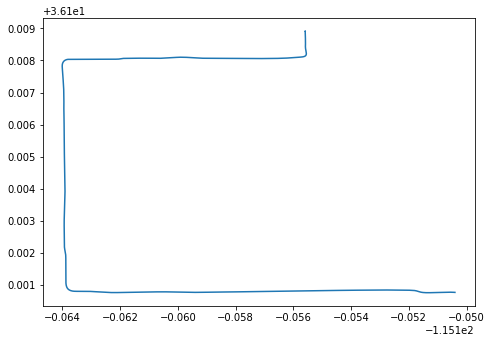

In [22]:
# Draw a trajectory using coordinates (to see how the car was moving)
%matplotlib inline
y = lat_list
x = lon_list
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y)